In [2]:
import os, sys, glob, csv
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# The GPU id to use, usually either "0" or "1"
# os.environ["CUDA_VISIBLE_DEVICES"]="1" 
import numpy as np
import pandas as pd
import shutil
import pickle
import tqdm
from tqdm import tqdm
import xlsxwriter
import random
from random import shuffle
from math import log, floor
import re
import collections
from collections import Counter
import string
import unicodedata as udata
import pause, datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from distutils.dir_util import copy_tree
import sklearn
from sklearn.metrics import *
import itertools as it

In [2]:
def basic_statistics(all_length):
    '''
    input: length list of elements
    output1: mean、std、mode、min、q1、median(q2)、q3、max、iqr、outlier、far out
    output2: statistics graph、10%~90% form
    '''
    stat_dict = {}
    stat_dict['mean'] = np.mean(all_length)
    stat_dict['std'] = np.std(all_length)
    stat_dict['mode'] = np.argmax(np.bincount(all_length))
    stat_dict['min'] = np.min(all_length)
    stat_dict['q1'] = np.quantile(all_length,0.25)
    stat_dict['median'] = np.quantile(all_length,0.5)
    stat_dict['q3'] = np.quantile(all_length,0.75)
    stat_dict['max'] = np.max(all_length)
    stat_dict['iqr'] = stat_dict['q3'] - stat_dict['q1']
    stat_dict['outlier'] = stat_dict['q3'] + 1.5*stat_dict['iqr']
    stat_dict['far_out'] = stat_dict['q3'] + 3*stat_dict['iqr']
    for i in [10,20,30,40,50,60,70,80,90,100]:
        stat_dict[str(i)+'%'] = np.percentile(all_length,i)
    return pd.DataFrame.from_dict(stat_dict,orient='index',columns=['length'])

# 需要
* tree-rep-profiles-o2o/
* tree-rep-profiles_one2one/

### 計算overall processes length dist. (不用跑)
* 包含small short & normal
* 目前還差了loner
* assertion test for checking dataset

In [3]:

root_dir = './data/tree-rep-profiles_one2one/'
# api_length = []
profile_length = []
processed_profile = []


rasmma_dir = next(os.walk(root_dir))[1]
for rasmma in rasmma_dir:
    fam_dir = next(os.walk(root_dir+rasmma))[1]
    for fam in tqdm(fam_dir):
        tree_dir = next(os.walk(root_dir +rasmma+'/'+ fam))[1]
        for tree in tree_dir:
            in_directory = root_dir+ rasmma+'/'+ fam +  '/' + tree + '/'
            hl_list = next(os.walk(in_directory))[2]
            hl_list = [os.path.join(in_directory, f) for f in hl_list]
            hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
            for profile in hl_list:
                name = profile.split('/')[-1]
                if name not in processed_profile:
                    with open(profile,encoding='ISO 8859-1') as f:
                        lines = f.read().splitlines()
                    processed_profile.append(name)
                    profile_length.append(len(lines))
                else:
                    paths = glob.glob(root_dir + '*/*/*/'+profile.split('/')[-1])
                    print('duplicate ERR:',paths)

len(processed_profile)

100%|██████████| 159/159 [00:00<00:00, 243.71it/s]


13356

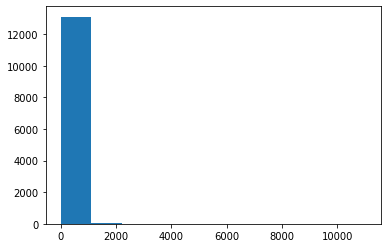

,length
mean,140.258972
std,230.168801
mode,104.000000
min,1.000000
q1,29.000000
median,85.000000
q3,111.000000
max,11008.000000
iqr,82.000000
outlier,234.000000


In [4]:
profile_stat_df = basic_statistics(profile_length)
plt.hist(profile_length) #,bins=[10,20,30,40,50,60,70,80,90,100,110]
plt.show()
pro_df = pd.DataFrame(data={'profile':sorted(profile_length)})
# pro_df.to_excel('data/tree-rep-profiles_o2o/profile_dist_overall_woLoners.xlsx',index=False)
profile_stat_df

### 計算normal processes length dist
* o2m original normal
* assertion test for checking dataset

In [4]:
# corpus = []
# window_size = 6
# dil= r"[,.;\-+^()/@#?!&$:{}\\*%~\'\"]+\ *" #等號、底線被保留
root_dir = './data/tree-rep-profiles_o2o/small_short/'
fam_dir = next(os.walk(root_dir))[1]
# api_length = []
profile_length = []
processed_profile = []
count = 0

for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        if len(hl_list) > 2:
            rep = pickle.load(open(in_directory + 'rep.pickle','rb'))
            rep = sum(rep,[])
            if len(rep)>10:
#                 count = count + 1 #normal
                print('ERR:',in_directory) #small_short
        for profile in hl_list:
            name = profile.split('/')[-1]
            if name not in processed_profile:
                with open(profile,encoding='ISO 8859-1') as f:
                    lines = f.read().splitlines()
                processed_profile.append(name)
                profile_length.append(len(lines))

len(processed_profile)

100%|██████████| 159/159 [00:00<00:00, 731.83it/s]


3385

In [5]:
# corpus = []
# window_size = 6
# dil= r"[,.;\-+^()/@#?!&$:{}\\*%~\'\"]+\ *" #等號、底線被保留
root_dir = './data/tree-rep-profiles_o2o_smallshort/small/'
fam_dir = next(os.walk(root_dir))[1]
# api_length = []
profile_length = []
processed_profile = []
count = 0

for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        if len(hl_list) > 2:
            print('ERR:',in_directory) #small_short
        for profile in hl_list:
            name = profile.split('/')[-1]
            if name not in processed_profile:
                with open(profile,encoding='ISO 8859-1') as f:
                    lines = f.read().splitlines()
                processed_profile.append(name)
                profile_length.append(len(lines))

len(processed_profile)

100%|██████████| 157/157 [00:00<00:00, 990.34it/s]


2316

In [6]:
# corpus = []
# window_size = 6
# dil= r"[,.;\-+^()/@#?!&$:{}\\*%~\'\"]+\ *" #等號、底線被保留
root_dir = './data/tree-rep-profiles_o2o/normal/'
fam_dir = next(os.walk(root_dir))[1]
# api_length = []
profile_length = []
processed_profile = []
count = 0

for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        if len(hl_list) < 3:
            print('ERR:',hl_list)
        rep = pickle.load(open(in_directory + 'rep.pickle','rb'))
        rep = sum(rep,[])
        if len(rep)<10:
#                 count = count + 1 #normal
            print('ERR:',in_directory) #small_short
        for profile in hl_list:
            name = profile.split('/')[-1]
            if name not in processed_profile:
                with open(profile,encoding='ISO 8859-1') as f:
                    lines = f.read().splitlines()
                processed_profile.append(name)
                profile_length.append(len(lines))

len(processed_profile)

100%|██████████| 138/138 [00:01<00:00, 123.71it/s]


9971

In [7]:
# corpus = []
# window_size = 6
# dil= r"[,.;\-+^()/@#?!&$:{}\\*%~\'\"]+\ *" #等號、底線被保留
root_dir = './data/tree-rep-profiles_o2o_smallshort/short/'
fam_dir = next(os.walk(root_dir))[1]
# api_length = []
profile_length = []
processed_profile = []
count = 0

for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        rep = pickle.load(open(in_directory + 'rep.pickle','rb'))
        rep = sum(rep,[])
        if len(rep)>10:
#                 count = count + 1 #normal
            print('ERR:',in_directory) #small_short
        for profile in hl_list:
            name = profile.split('/')[-1]
            if name not in processed_profile:
                with open(profile,encoding='ISO 8859-1') as f:
                    lines = f.read().splitlines()
                processed_profile.append(name)
                profile_length.append(len(lines))

len(processed_profile)

100%|██████████| 89/89 [00:00<00:00, 1527.07it/s]


1375

In [39]:
in_directory = './data/tree-rep-profiles_o2o/normal/3.allaple_0.8/G2097/'

In [42]:
rep = pickle.load(open(in_directory + 'rep.pickle','rb'))
in_dir = './data/tree-rep-profiles_o2o/TEST/3.allaple_0.8/G2097/'
byte = pickle.load(open(in_dir + 'fd6a50b331f733430232c445628891f1c00aa8dbfc71feb3a1550cf88976ea46_3404_byterep.pickle','rb'))

In [43]:
byte , in_directory

([0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1],
 './data/tree-rep-profiles_o2o/normal/3.allaple_0.8/G2097/')

In [44]:
rep

[['LoadLibrary#PR@SYS@msvcrt@DLL#Ret#0',
  'LoadLibrary#PR@SYS@imagehlp@DLL#Ret#0',
  'RegQueryValue#PR@HKLM@sys_curCtlSet_ctl_sessionManager\\*#PR@SUBK@criticalsectiontimeout#PR@0#PR@12f824#Ret#0',
  'RegQueryValue#PR@HKLM@soft_ms_ole\\*#PR@SUBK@rwlockresourcetimeout#PR@0#PR@12f828#Ret#P',
  'LoadLibrary#PR@SYS@shell32@DLL#Ret#0',
  'RegQueryValue#PR@HKLM@sys_setup\\#PR@SUBK@systemsetupinprogress#PR@REG_DWORD#PR@0#Ret#0',
  'LoadLibrary#PR@ARB@windowsshell@MANIFEST#Ret#N',
  'CreateFile#PR@ARB@MANIFEST#PR@GENERIC_READ#PR@OPEN_EXISTING#PR@FILE_SHARE_DELETE;FILE_SHARE_READ#Ret#0',
  'RegQueryValue#PR@HKCU@desktop\\#PR@SUBK@smoothscroll#PR@0#PR@77462a48#Ret#P',
  'RegQueryValue#PR@HKCU@soft_ms_win_explorer\\advanced#PR@SUBK@enableballoontips#PR@0#PR@77462170#Ret#P',
  'RegEnumValue#PR@HKLM@soft_ms_winNT_languagepack\\*#PR@SUBK@surr#PR@REG_DWORD#PR@2#Ret#0',
  'RegQueryValue#PR@HKCU@desktop\\#PR@SUBK@smoothscroll#PR@0#PR@5d102058#Ret#P',
  'LoadLibrary#PR@SYS@advapi32@DLL#Ret#0',
  'LoadL

In [24]:
rep

[['RegQueryValue#PR@HKLM@sys_curCtlSet_ctl_sessionManager\\*#PR@SUBK@criticalsectiontimeout#PR@0#PR@12f9b0#Ret#0',
  'RegQueryValue#PR@HKLM@soft_ms_ole\\*#PR@SUBK@rwlockresourcetimeout#PR@0#PR@12f9b4#Ret#P',
  'LoadLibrary#PR@SYS@uxtheme@DLL#Ret#0',
  'RegQueryValue#PR@HKCU@soft_ms_win_thememanager\\*#PR@SUBK@compositing#PR@12e66c#PR@12e67c#Ret#P',
  'RegQueryValue#PR@HKCU@desktop\\#PR@SUBK@lamebuttontext#PR@12e878#PR@5ada1620#Ret#P',
  'LoadLibrary#PR@SYS@uxtheme@DLL#Ret#0',
  'LoadLibrary#PR@SYS@oleaut32@DLL#Ret#0',
  'LoadLibrary#PR@SYS@sxs@DLL#Ret#0',
  'LoadLibrary#PR@SYS@oleaut32@DLL#Ret#0',
  'RegQueryValue#PR@HKLM@soft_ms_winNT_imm\\*#PR@SUBK@ime file#PR@0#PR@12f44c#Ret#0',
  'LoadLibrary#PR@SYS@version@DLL#Ret#0',
  'LoadLibrary#PR@SYS@msctfime@IME#Ret#0',
  'CreateFile#PR@SYS@IME#PR@GENERIC_READ#PR@OPEN_EXISTING#PR@FILE_SHARE_DELETE;FILE_SHARE_READ#Ret#0',
  'LoadLibrary#PR@SYS@msctfime@IME#Ret#0',
  'CreateFile#PR@SYS@IME#PR@GENERIC_READ#PR@OPEN_EXISTING#PR@FILE_SHARE_DELETE

In [26]:
rep= sum(rep,[])
len(rep)

20

In [6]:
root_dir = './data/tree-rep-profiles-partial/'
profile = '6fb1ab2ea32499ee45ca81efb62f85aaf80a528511ec8841bb8c14713a02dfa9_2932.profile'
# profile = '78f986761db48863d3fb54fd0b346df84a123c7e4b87384abaccf592cb3d40d8_3228.profile'
paths = glob.glob(root_dir + '*/*/*/'+profile)
paths

['./data/tree-rep-profiles-partial/normal/4.zbot_0.8/G1332/6fb1ab2ea32499ee45ca81efb62f85aaf80a528511ec8841bb8c14713a02dfa9_2932.profile']

In [38]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
x = np.array([[[0,1],[0,1],[1,1]],[[1,1],[0,1],[0,1]]])
y = [1,2]
clf = NearestCentroid()
clf.fit(x,y)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [39]:
x = np.array([[[0,1],[0,1],[1,1]],[[1,1],[0,1],[0,1]]])
print(x.shape)
y = np.array([[0,1],[1,0],[0,1]])
y2 = np.array([[0,1],[1,0]])
sklearn.metrics.pairwise.cosine_similarity(y,y2)

(2, 3, 2)


array([[1., 0.],
       [0., 1.],
       [1., 0.]])

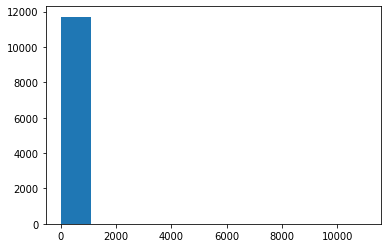

,length
mean,104.100793
std,204.068370
mode,104.000000
min,1.000000
q1,24.000000
median,69.000000
q3,104.000000
max,11008.000000
iqr,80.000000
outlier,224.000000


In [8]:
profile_stat_df = basic_statistics(profile_length)
plt.hist(profile_length) #,bins=[10,20,30,40,50,60,70,80,90,100,110]
plt.show()
pro_df = pd.DataFrame(data={'profile':sorted(profile_length)})
pro_df.to_excel('data/tree-rep-profiles_o2o/profile_dist_smallshort.xlsx',index=False)
profile_stat_df

***

## statistics
* 從此開始跑
* 需要tree-rep-profiles_one2one (read only)
* 需要 tree-rep-profiles_o2o (write)

In [3]:
def statistic_hash_pids(root_dir):
    fam_dir = next(os.walk(root_dir))[1]
    all_pids= []
    all_pid_list = []
    tree_count = 0
    for fam in tqdm(fam_dir):
        tree_dir = next(os.walk(root_dir + fam))[1]
        tree_count += len(tree_dir)
        for tree in tree_dir:
            in_directory = root_dir + fam +  '/' + tree + '/'
            hl_list = next(os.walk(in_directory))[2]
            hl_list = [os.path.join(in_directory, f) for f in hl_list]
            hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
            hash_list = [f.split('/')[-1].split('_')[0] for f in hl_list]
            pid_list = [f.split('/')[-1] for f in hl_list]
            all_pids.extend(hash_list)
            all_pid_list.extend(pid_list)
#             print(fam,len(hash_list)) #DEBUG
    all_hash = set(all_pids)
    print('Families#:',len(fam_dir),'Samples#:',len(all_hash),',Processes#:',len(set(all_pid_list)),',Trees#:',tree_count)
    return all_hash, list(set(all_pid_list))

In [4]:
root_dir = './data/tree-rep-profiles_one2one/normal/'
fam_dir_normal = next(os.walk(root_dir))[1]
print(len(fam_dir_normal))
fam_dir_normal

138


['151.brresmon_0.8',
 '18.domaiq_0.8',
 '85.ipamor_0.8',
 '75.crytex_0.8',
 '65.smshoax_0.8',
 '61.virlock_0.8',
 '79.lydra_0.8',
 '11.zusy_0.8',
 '2.zbot_0.8',
 '82.madangel_0.8',
 '158.amonetize_0.8',
 '26.autoit_0.8',
 '139.softonic_0.8',
 '148.dldpk_0.8',
 '57.vilsel_0.8',
 '77.bifrose_0.8',
 '25.browsefox_0.8',
 '137.vbna_0.8',
 '118.asoecem_0.8',
 '20.ramnit_0.8',
 '101.banker_0.8',
 '19.installcore_0.8',
 '17.sality_0.8',
 '53.killav_0.8',
 '51.ircbot_0.8',
 '70.lollipop_0.8',
 '72.gamevance_0.8',
 '113.ipz_0.8',
 '16.sytro_0.8',
 '48.upatre_0.8',
 '132.fareit_0.8',
 '30.kdz_0.8',
 '64.hupigon_0.8',
 '55.medfos_0.8',
 '93.casino_0.8',
 '6.virut_0.8',
 '59.installrex_0.8',
 '91.loring_0.8',
 '63.aira_0.8',
 '27.downloa_0.8',
 '5.ursu_0.8',
 '12.expiro_0.8',
 '92.valla_0.8',
 '84.vbkrypt_0.8',
 '112.installmonetizer_0.8',
 '31.elkern_0.8',
 '32.outbrowse_0.8',
 '13.vobfus_0.8',
 '40.msil_0.8',
 '15.graftor_0.8',
 '4.kazy_0.8',
 '7.solimba_0.8',
 '129.dealply_0.8',
 '41.ibryte_0.8'

In [5]:

root_dir = './data/tree-rep-profiles_one2one/'
# api_length = []
process_lengths_normal = []
process_lengths_overall = []
rep_length_normal = []
rep_length_overall = []
tree_samples_normal = []
tree_samples_overall = []
tree_processes_normal = []
tree_processes_overall = []
sample_processes_normal = {}
sample_processes_overall = {}
fam_processes_normal = []
fam_processes_overall = dict.fromkeys(fam_dir_normal,0)
fam_samples_normal = []
fam_samples_overall = dict.fromkeys(fam_dir_normal,0)
# processed_profile = []
trees_normal = []
trees_overall = dict.fromkeys(fam_dir_normal,0) 

rasmma_dir = next(os.walk(root_dir))[1]
for rasmma in rasmma_dir:
    fam_dir = next(os.walk(root_dir+rasmma))[1]
    for fam in tqdm(fam_dir):
        if fam not in fam_dir_normal:
            continue
        tree_dir = next(os.walk(root_dir +rasmma+'/'+ fam))[1]
        if rasmma == 'normal':
#             assert len(tree_dir)>2
            trees_normal.append(len(tree_dir))
        trees_overall[fam] = trees_overall[fam] + len(tree_dir)
        fam_processes = 0
        fam_sample = []
        fam_sample_all = []
        for tree in tree_dir:
            in_directory = root_dir+ rasmma+'/'+ fam +  '/' + tree + '/'
            hl_list = next(os.walk(in_directory))[2]
            hl_list = [os.path.join(in_directory, f) for f in hl_list]
            hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
            rep = pickle.load(open(in_directory + 'rep.pickle','rb'))
            rep = sum(rep,[])
            fam_processes_overall[fam] = fam_processes_overall[fam] + len(hl_list)
            if rasmma == 'normal':
                assert len(rep) > 10
                assert len(hl_list) > 2
                rep_length_normal.append(len(rep))
                tree_processes_normal.append(len(hl_list))
                fam_processes = fam_processes + len(hl_list)
            rep_length_overall.append(len(rep))
            tree_processes_overall.append(len(hl_list))
            
            tree_samples = []
            for profile in hl_list:
                hash_sample = profile.split('/')[-1].split('_')[0]
                tree_samples.append(hash_sample)
                try:
                    sample_processes_overall[hash_sample] = sample_processes_overall[hash_sample] + 1
                except KeyError:
                    sample_processes_overall[hash_sample] = 1
                
#                 tree_samples_overall.append(hash_sample)
#                 name = profile.split('/')[-1]
#                 if name not in processed_profile:
                with open(profile,encoding='ISO 8859-1') as f:
                    lines = f.read()
                lines = re.sub(r'[^\x00-\x7F]+','', lines)
                lines = re.sub(r'[\x1e\x7f\x15\x10\x0c\x1c]+','', lines)
                lines = re.sub('y\\n','',lines)
                lines = re.sub('=\\n','',lines)
                lines = lines.splitlines()
#                     processed_profile.append(name)
                fam_sample_all.append(hash_sample)
                if rasmma == 'normal':
                    process_lengths_normal.append(len(lines))
                    fam_sample.append(hash_sample)
                    try:
                        sample_processes_normal[hash_sample] = sample_processes_normal[hash_sample] + 1
                    except KeyError:
                        sample_processes_normal[hash_sample] = 1
                process_lengths_overall.append(len(lines))
            tree_samples_overall.append(len(set(tree_samples)))
            if rasmma == 'normal':
                tree_samples_normal.append(len(set(tree_samples)))
        fam_samples_overall[fam] = fam_samples_overall[fam] + len(set(fam_sample_all))
        if rasmma == 'normal':
            fam_processes_normal.append(fam_processes)
            fam_samples_normal.append(len(set(fam_sample)))
#                 else:
#                     paths = glob.glob(root_dir + '*/*/*/'+profile.split('/')[-1])
#                     print('duplicate ERR:',paths)

assert len(trees_normal) == len(fam_dir_normal) == len(fam_processes_normal) == len(fam_samples_normal)
assert sum(trees_normal) == len(tree_samples_normal) == len(tree_processes_normal)
# len(processed_profile)

100%|██████████| 159/159 [00:01<00:00, 121.85it/s]


In [6]:
tmp = statistic_hash_pids('./data/tree-rep-profiles_one2one/small_short/')

100%|██████████| 159/159 [00:00<00:00, 3276.04it/s]

Families#: 159 Samples#: 2462 ,Processes#: 3385 ,Trees#: 1323


In [7]:
def output_xlsx(statistics,i):
    '''
    Input: list or dict. i for iter
    Output: xlsx
    '''
    output_root_path = 'data/tree-rep-profiles_o2o/df' + str(i+1) + '.xlsx'
    try:
        df = basic_statistics(statistics)
    except TypeError:
        df = basic_statistics(list(statistics.values()))
    df.to_excel(output_root_path,index=True,sheet_name='df'+str(i+1))
    return df

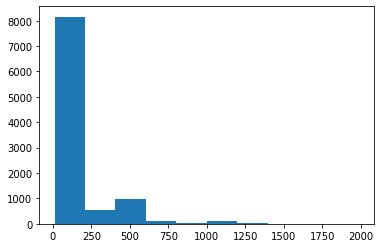

In [46]:

plt.hist(process_lengths_normal) #,bins=[10,20,30,40,50,60,70,80,90,100,110]
plt.show()
pro_df = pd.DataFrame(data={'profile':sorted(process_lengths_normal)})
pro_df.to_excel('data/tree-rep-profiles_o2o/profile_dist.xlsx',index=False)

In [8]:
df_all_list = []
for i,stat in enumerate([trees_normal,trees_overall,process_lengths_normal,process_lengths_overall
                         ,rep_length_normal,rep_length_overall,tree_samples_normal,tree_processes_normal,
                        tree_samples_overall,tree_processes_overall,fam_samples_normal,fam_processes_normal,
                        fam_samples_overall,fam_processes_overall,sample_processes_normal,sample_processes_overall]):
    df_all_list.append(output_xlsx(stat,i))
df_all_list[-1]

,length
mean,1.453635
std,1.260364
mode,1.000000
min,1.000000
q1,1.000000
median,1.000000
q3,1.000000
max,20.000000
iqr,0.000000
outlier,1.000000


In [9]:
Counter(list(sample_processes_overall.values()))

Counter({1: 6943,
         2: 1483,
         4: 293,
         9: 12,
         8: 38,
         3: 151,
         6: 37,
         7: 39,
         11: 1,
         5: 58,
         10: 11,
         12: 7,
         15: 3,
         14: 6,
         20: 2,
         17: 2,
         13: 2,
         16: 2,
         18: 1})

## outlier remove to 5.long

In [57]:
print(np.percentile(process_lengths_normal,82))

226.79999999999927


In [10]:
outlier_len_profile = df_all_list[2].loc['outlier'].values[0] #outlier
outlier_len_profile 

226.0

In [11]:
# corpus = []
# window_size = 6
# dil= r"[,.;\-+^()/@#?!&$:{}\\*%~\'\"]+\ *" #等號、底線被保留
mv_dir = './data/tree-rep-profiles_o2o/5.long/'
root_dir = './data/tree-rep-profiles_o2o/normal/'
fam_dir = next(os.walk(root_dir))[1]
remove_pids = 0
nobyteseq = 0

for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        for profile in hl_list:
            with open(profile,encoding='ISO 8859-1') as f:
                lines = f.read().splitlines()
            if len(lines)> outlier_len_profile:
                dest_path = mv_dir + fam + '/' + tree + '/'
                if not os.path.exists(dest_path):
                    os.makedirs(dest_path,exist_ok=True)
                shutil.move(profile,dest_path+profile.split('/')[-1])
                byteseq = profile.split('.profile')[0] + '_byterep.pickle'
                try:
                    shutil.move(byteseq,dest_path+byteseq.split('/')[-1])
                except FileNotFoundError:
                    print(fam,tree)
                    nobyteseq +=1
                remove_pids +=1
print('remove processes:',remove_pids,'No byteseq:',nobyteseq)
#remove processes: 1759

100%|██████████| 138/138 [00:00<00:00, 283.45it/s]

remove processes: 1795 No byteseq: 0


In [12]:
temp = statistic_hash_pids(mv_dir) #long

100%|██████████| 72/72 [00:00<00:00, 2605.29it/s]

Families#: 72 Samples#: 1673 ,Processes#: 1795 ,Trees#: 239


In [15]:
#要多執行幾次直到把空fam或是tree皆移除
root_dir = './data/tree-rep-profiles_o2o/normal/'
fam_dir = next(os.walk(root_dir))[1]
empty_tree = 0
empty_fam = 0
for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    fam_tree = {}
    if len(tree_dir) == 0:
        shutil.move(root_dir + fam  ,mv_dir+fam)
        empty_fam +=1
        print(fam)
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        if len(hl_list) == 0: #移除tree底下的member僅有0個者
            shutil.move(root_dir + fam +  '/' + tree ,mv_dir+fam+'/'+tree)
            empty_tree +=1
print('Empty Tree#:',empty_tree,'Empty Fam#:',empty_fam)


all_hash,all_pid_list = statistic_hash_pids(root_dir) # 65.smshoax_0.8 148.dldpk_0.8 114.rbot_0.8 147.ranpax_0.8 107.jorik_0.8

100%|██████████| 133/133 [00:00<00:00, 2904.34it/s]

Empty Tree#: 0 Empty Fam#: 0
Families#: 133 Samples#: 6056 ,Processes#: 8176 ,Trees#: 808


In [16]:
root_dir = './data/tree-rep-profiles_o2o_smallshort/small/'
tmp = statistic_hash_pids(root_dir)
root_dir = './data/tree-rep-profiles_o2o_smallshort/short/'
tmp = statistic_hash_pids(root_dir)

100%|██████████| 89/89 [00:00<00:00, 7882.53it/s]

Families#: 157 Samples#: 1835 ,Processes#: 2316 ,Trees#: 1158
Families#: 89 Samples#: 934 ,Processes#: 1375 ,Trees#: 318


## Train, Dev, Test split
* 拿tree數量sample的10%給valid、10%給test
* 不足此數量的tree跳過
* 拿回該sample所有在fam tree的process (僅第一種還原fam方法才有)

In [17]:
root_dir = './data/tree-rep-profiles_o2o/normal/'
fam_dir = next(os.walk(root_dir))[1]

valid_dir = './data/tree-rep-profiles_o2o/DEV/'
test_dir = './data/tree-rep-profiles_o2o/TEST/'

In [133]:
# 此做法為希望系統可以還原family，而非評估individual tree rep，依照sample來分並且會拿process
'''for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        hash_list = list(set([x.split('/')[-1].split('_')[0] for x in hl_list]))
        if len(hash_list)>10:# 從各tree拿一個sample給dev一個給test
#             dest_path = valid_dir + fam + '/' + tree + '/'
#             if not os.path.exists(dest_path):
#                 os.makedirs(dest_path,exist_ok=True)
            inf_idx = random.sample(range(0,len(hash_list)),int(len(hash_list)*0.2))
            valid_idx = random.sample(inf_idx,int(len(inf_idx)/2))
            test_idx = list(set(inf_idx)-set(valid_idx))
            valid_hash = [hash_list[x] for x in valid_idx]
            test_hash = [hash_list[x] for x in test_idx]
            valid_paths = []
            for valid in valid_hash:
                paths = glob.glob(root_dir + '*/*/' + valid + '*')
                valid_paths.extend(paths)
            test_paths = []
            for test in test_hash:
                paths = glob.glob(root_dir + '*/*/' + test + '*')
                test_paths.extend(paths)  
            for source_path in valid_paths:
                dest_path = source_path.replace(root_dir.split('/')[-2],valid_dir.split('/')[-2])
                dev_dir = '/'.join(dest_path.split('/')[:-1]) + '/'
                if not os.path.exists(dev_dir):
                    os.makedirs(dev_dir,exist_ok=True)
                shutil.move(source_path,dest_path)
            for source_path in test_paths:
                dest_path = source_path.replace(root_dir.split('/')[-2],test_dir.split('/')[-2])
                dev_dir = '/'.join(dest_path.split('/')[:-1]) + '/'
                if not os.path.exists(dev_dir):
                    os.makedirs(dev_dir,exist_ok=True)
                shutil.move(source_path,dest_path)
            '''

100%|██████████| 130/130 [00:12<00:00, 10.12it/s]


In [18]:
# 此做法為還原tree，依照process來分

for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
#         hash_list = list(set([x.split('/')[-1].split('_')[0] for x in hl_list]))
        if len(hl_list)>10:# 從各tree拿一個sample給dev一個給test
#             dest_path = valid_dir + fam + '/' + tree + '/'
#             if not os.path.exists(dest_path):
#                 os.makedirs(dest_path,exist_ok=True)
            inf_idx = random.sample(range(0,len(hl_list)),int(len(hl_list)*0.2))
            valid_idx = random.sample(inf_idx,int(len(inf_idx)/2))
            test_idx = list(set(inf_idx)-set(valid_idx))
            valid_paths = [hl_list[x] for x in valid_idx]
            test_paths = [hl_list[x] for x in test_idx]
#             valid_paths = []
#             for valid in valid_pid:
#                 paths = glob.glob(root_dir + '*/*/' + valid + '*')
#                 valid_paths.extend(paths)
#             test_paths = []
#             for test in test_pid:
#                 paths = glob.glob(root_dir + '*/*/' + test + '*')
#                 test_paths.extend(paths)  
            for source_path in valid_paths:
                dest_path = source_path.replace(root_dir.split('/')[-2],valid_dir.split('/')[-2])
                dev_dir = '/'.join(dest_path.split('/')[:-1]) + '/'
                if not os.path.exists(dev_dir):
                    os.makedirs(dev_dir,exist_ok=True)
                shutil.move(source_path,dest_path)
                source_path = source_path.replace('.profile','_byterep.pickle')
                dest_path = dest_path.replace('.profile','_byterep.pickle')
                shutil.move(source_path,dest_path)
            for source_path in test_paths:
                dest_path = source_path.replace(root_dir.split('/')[-2],test_dir.split('/')[-2])
                dev_dir = '/'.join(dest_path.split('/')[:-1]) + '/'
                if not os.path.exists(dev_dir):
                    os.makedirs(dev_dir,exist_ok=True)
                shutil.move(source_path,dest_path)
                source_path = source_path.replace('.profile','_byterep.pickle')
                dest_path = dest_path.replace('.profile','_byterep.pickle')
                shutil.move(source_path,dest_path)            

100%|██████████| 133/133 [00:00<00:00, 1663.35it/s]


In [19]:
temp = statistic_hash_pids(root_dir)
temp = statistic_hash_pids(valid_dir)
temp = statistic_hash_pids(test_dir)


100%|██████████| 47/47 [00:00<00:00, 9910.63it/s]

Families#: 133 Samples#: 5466 ,Processes#: 7215 ,Trees#: 808
Families#: 47 Samples#: 431 ,Processes#: 453 ,Trees#: 135
Families#: 47 Samples#: 481 ,Processes#: 508 ,Trees#: 135


# Loner kNN data
* 選取loner有在dev跟test裡面的fam就好

In [7]:
root_dir = './data/tree-rep-profiles_o2o/DEV/' #改調所依據的家族
loner_dir = './data/tree-rep-profiles_o2o_loner/'
exp_dir = './data/tree-rep-profiles_o2o/EXP2/'
# outlier_len_profile = 226

exp_fam = next(os.walk(root_dir))[1] #改align root_dir? 要進行家族歸類的家族
exp_fam_dir = [x.split('_')[0] for x in exp_fam]
aliase_fam = [x.split('.')[-1] for x in exp_fam_dir]
len(exp_fam_dir),exp_fam_dir , aliase_fam

(47,
 ['18.domaiq',
  '85.ipamor',
  '79.lydra',
  '11.zusy',
  '2.zbot',
  '26.autoit',
  '57.vilsel',
  '25.browsefox',
  '20.ramnit',
  '17.sality',
  '16.sytro',
  '55.medfos',
  '6.virut',
  '27.downloa',
  '5.ursu',
  '12.expiro',
  '32.outbrowse',
  '13.vobfus',
  '15.graftor',
  '4.kazy',
  '7.solimba',
  '52.megasearch',
  '14.hotbar',
  '45.bdmj',
  '29.parite',
  '1.fakeav',
  '37.somoto',
  '8.fakealert',
  '62.directdow',
  '39.sirefef',
  '50.shodi',
  '24.softpulse',
  '312.katusha',
  '21.soft',
  '96.pcclient',
  '58.picsys',
  '54.fesber',
  '22.razy',
  '73.yantai',
  '10.symmi',
  '33.mira',
  '49.eggnog',
  '23.mplug',
  '3.allaple',
  '35.morstar',
  '69.clickdownload',
  '68.installerex'],
 ['domaiq',
  'ipamor',
  'lydra',
  'zusy',
  'zbot',
  'autoit',
  'vilsel',
  'browsefox',
  'ramnit',
  'sality',
  'sytro',
  'medfos',
  'virut',
  'downloa',
  'ursu',
  'expiro',
  'outbrowse',
  'vobfus',
  'graftor',
  'kazy',
  'solimba',
  'megasearch',
  'hotbar',


In [9]:
def statistic_hash_pids(root_dir):
    fam_dir = next(os.walk(root_dir))[1]
    all_pids= []
    all_pid_list = []
    tree_count = 0
    for fam in tqdm(fam_dir):
        tree_dir = next(os.walk(root_dir + fam))[1]
        tree_count += len(tree_dir)
        for tree in tree_dir:
            in_directory = root_dir + fam +  '/' + tree + '/'
            hl_list = next(os.walk(in_directory))[2]
            hl_list = [os.path.join(in_directory, f) for f in hl_list]
            hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
            hash_list = [f.split('/')[-1].split('_')[0] for f in hl_list]
            pid_list = [f.split('/')[-1] for f in hl_list]
            all_pids.extend(hash_list)
            all_pid_list.extend(pid_list)
#             print(fam,len(hash_list)) #DEBUG
    all_hash = set(all_pids)
    print('Families#:',len(fam_dir),'Samples#:',len(all_hash),',Processes#:',len(set(all_pid_list)),',Trees#:',tree_count)
    return all_hash, list(set(all_pid_list))

In [21]:
df = pd.read_csv('./data/FamilyName_aliases.csv')
df = df.set_index('Unnamed: 0')
name_df_aliases = df[aliase_fam]
name_df_aliases

,domaiq,ipamor,lydra,zusy,zbot,autoit,vilsel,browsefox,ramnit,sality,...,razy,yantai,symmi,mira,eggnog,mplug,allaple,morstar,clickdownload,installerex
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
b048ab49d6bceac3161a369ff83679e870ddcd70a2b2524bf8cecb07b6bdaa35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
164d8ccd062f92f1b12ef1d6c3ba282ee28441bbd0bc3cbdda5836bb49877205,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
013b72d5c6d8b5b2139ef2edef18568dfe01d7bf019c3707911937bebe87efba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7f25186ea379f37cf55bd003855ed665fdb79ea153c52e7ab2a293524573b6ff,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7bbc7153effc4aa7dfe232858012eff84b20730626afecf563af5fb63bcfe862,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
91c7b7e9d14f25ff0694ddf2ae3c3ee3a827e71e0e5755560b47ffcee326dab5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
14cd5b1e4197d47a39811461c4af479735f74cb0660b8555b2463b7f63899959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
09ef5ac933929e79a03140a731771e686fc8a61040795658c6d9dfaae9ebf959,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7ead38dd051938421b8fc1b00235799c1de484ad85cdbebda6c2589bf013389d,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#aliases
print('sklearn version need >0.21 now:',sklearn.__version__)
aliases_li = []
all_process_fam = []
for a,b in it.combinations(name_df_aliases.columns.tolist(),2): 
    score = jaccard_score(name_df_aliases.loc[:,a].values , name_df_aliases.loc[:,b].values)
    if score > 0.6: #可改相似度thr
        print(a,b,score)
        if (a in all_process_fam) and (b not in all_process_fam):
            for aliases in aliases_li:
                if a in aliases:
                    aliases_li.remove(aliases)
                    aliases.append(b)
                    aliases_li.append(aliases)
                    all_process_fam.append(b)
        elif (b in all_process_fam) and (b not in all_process_fam):
            for aliases in aliases_li:
                if b in aliases:
                    aliases_li.remove(aliases)
                    aliases.append(a)
                    aliases_li.append(aliases)
                    all_process_fam.append(a)
        elif (a in all_process_fam) and (b in all_process_fam):
            pass
        else:
            aliases_li.append([a,b])
            all_process_fam.append(b)
            all_process_fam.append(a)
# ['allaple','rahack']
# []
aliases_li

sklearn version need >0.21 now: 0.21.2
downloa soft 0.6121045392022009
fakeav fakealert 0.6850640857964949


[['downloa', 'soft'], ['fakeav', 'fakealert']]

copy loners to EXP dir 

In [8]:
outlier_profile = []
for fam in tqdm(exp_fam_dir):
    in_directory =  loner_dir + fam + '/G0/'
    profiles = next(os.walk(in_directory))[2]  # 可能某些familiy會沒loner
    hl_list = [os.path.join(in_directory, f) for f in profiles]
    hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
    for profile in hl_list:
        with open(profile,encoding='ISO 8859-1') as f:
            lines = f.read()
        lines = re.sub(r'[^\x00-\x7F]+','', lines)
        lines = re.sub(r'[\x1e\x7f\x15\x10\x0c\x1c]+','', lines)
        lines = re.sub('=\\n','',lines)
        lines = re.sub('y\\n','',lines)
        lines = lines.splitlines() #Ri
        if len(lines) > outlier_len_profile: #太長的放不進去model 需要紀錄?
            outlier_profile.append(profile)
            continue
        profile_name = profile.split('/')[-1]
        fam_name = profile.split('/')[3].split('.')[-1]
        '''        for aliases in aliases_li:
            if fam_name in aliases:
                fam_name = aliases[0]+'_'+aliases[1] #aliases analyze and combine'''

        dest_dir = exp_dir + fam_name + "/G0/"
        if not os.path.exists(dest_dir):
            os.makedirs(dest_dir,exist_ok=True)
        shutil.copy(profile,dest_dir+profile_name)
temp = statistic_hash_pids(exp_dir) #真正拿來做實驗的loners

100%|██████████| 47/47 [00:05<00:00,  8.92it/s]


NameError: name 'statistic_hash_pids' is not defined

In [14]:
outlier_profile_hash = [x.split('/')[-1].split('_')[0] for x in outlier_profile]
outlier_profile_fam = [x.split('/')[3] for x in outlier_profile]
print(len(set(outlier_profile_hash)),len(outlier_profile),len(set(outlier_profile_fam)))

1239 1375 47


In [13]:
outlier_profile[0]

'./data/tree-rep-profiles_o2o_loner/18.domaiq/G0/9b2872cee6bc8c1e75de775ef7796e2e0efa8aae97411ccc151e99b4df0bb759_432.profile'

In [61]:
rep_dir = './data/tree-rep-profiles_o2o/normal/3.allaple_0.8/G2100/'
rep = pickle.load(open(rep_dir + 'rep.pickle','rb'))
rep

[['RegQueryValue#PR@HKLM@system\\currentcontrolset\\services\\winsock2\\parameters#PR@SUBK@winsock_registry_version#PR@REG_SZ#PR@2.0#Ret#0',
  'RegQueryValue#PR@HKLM@sys_curCtlSet_svc_winsock2_catalog9\\*#PR@SUBK@serial_access_num#PR@REG_DWORD#PR@6#Ret#0',
  'RegQueryValue#PR@HKLM@sys_curCtlSet_svc_winsock2_catalog9\\*#PR@SUBK@next_catalog_entry_id#PR@REG_DWORD#PR@1020#Ret#0',
  'RegQueryValue#PR@HKLM@sys_curCtlSet_svc_winsock2_catalog9\\*#PR@SUBK@num_catalog_entries#PR@REG_DWORD#PR@13#Ret#0',
  'RegQueryValue#PR@HKLM@sys_curCtlSet_svc_winsock2_catalog9\\*#PR@SUBK@packedcatalogitem#PR@0#PR@0#Ret#0',
  'RegQueryValue#PR@HKLM@sys_curCtlSet_svc_winsock2_catalog9\\*#PR@SUBK@packedcatalogitem#PR@REG_BINARY#PR@2553797374656D526F6F74255C73797374656D33325C6D7377736F636B2E646C6C0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [62]:
rep_dir = './data/tree-rep-profiles_o2o/normal/3.allaple_0.8/G2097/'
rep = pickle.load(open(rep_dir + 'rep.pickle','rb'))
rep

[['LoadLibrary#PR@SYS@msvcrt@DLL#Ret#0',
  'LoadLibrary#PR@SYS@imagehlp@DLL#Ret#0',
  'RegQueryValue#PR@HKLM@sys_curCtlSet_ctl_sessionManager\\*#PR@SUBK@criticalsectiontimeout#PR@0#PR@12f824#Ret#0',
  'RegQueryValue#PR@HKLM@soft_ms_ole\\*#PR@SUBK@rwlockresourcetimeout#PR@0#PR@12f828#Ret#P',
  'LoadLibrary#PR@SYS@shell32@DLL#Ret#0',
  'RegQueryValue#PR@HKLM@sys_setup\\#PR@SUBK@systemsetupinprogress#PR@REG_DWORD#PR@0#Ret#0',
  'LoadLibrary#PR@ARB@windowsshell@MANIFEST#Ret#N',
  'CreateFile#PR@ARB@MANIFEST#PR@GENERIC_READ#PR@OPEN_EXISTING#PR@FILE_SHARE_DELETE;FILE_SHARE_READ#Ret#0',
  'RegQueryValue#PR@HKCU@desktop\\#PR@SUBK@smoothscroll#PR@0#PR@77462a48#Ret#P',
  'RegQueryValue#PR@HKCU@soft_ms_win_explorer\\advanced#PR@SUBK@enableballoontips#PR@0#PR@77462170#Ret#P',
  'RegEnumValue#PR@HKLM@soft_ms_winNT_languagepack\\*#PR@SUBK@surr#PR@REG_DWORD#PR@2#Ret#0',
  'RegQueryValue#PR@HKCU@desktop\\#PR@SUBK@smoothscroll#PR@0#PR@5d102058#Ret#P',
  'LoadLibrary#PR@SYS@advapi32@DLL#Ret#0',
  'LoadL

## Loners similarity computation
* 取出實驗家族exp_fam所含有的profiles
* 利用RasMMA計算是否是跟自己家族的行為樹最相近
* 如果是就把它移到exp_dir
* Deprecation:
    * 不應該profile跟rep比
    * 應該要profile跟rep(tree)的memeber比

In [60]:
root_dir = './data/tree-rep-profiles_o2o/DEV/'
loner_dir = './data/tree-rep-profiles_o2o_loner/'
exp_dir = './data/tree-rep-profiles_o2o/EXP_rasmma/'

exp_fam = next(os.walk(root_dir))[1] #改align root_dir? 要進行家族歸類的家族
exp_fam_dir = [x.split('_')[0] for x in exp_fam]
len(exp_fam_dir),exp_fam_dir

(47,
 ['18.domaiq',
  '85.ipamor',
  '79.lydra',
  '11.zusy',
  '2.zbot',
  '26.autoit',
  '57.vilsel',
  '25.browsefox',
  '20.ramnit',
  '17.sality',
  '16.sytro',
  '55.medfos',
  '6.virut',
  '27.downloa',
  '5.ursu',
  '12.expiro',
  '32.outbrowse',
  '13.vobfus',
  '15.graftor',
  '4.kazy',
  '7.solimba',
  '52.megasearch',
  '14.hotbar',
  '45.bdmj',
  '29.parite',
  '1.fakeav',
  '37.somoto',
  '8.fakealert',
  '62.directdow',
  '39.sirefef',
  '50.shodi',
  '24.softpulse',
  '312.katusha',
  '21.soft',
  '96.pcclient',
  '58.picsys',
  '54.fesber',
  '22.razy',
  '73.yantai',
  '10.symmi',
  '33.mira',
  '49.eggnog',
  '23.mplug',
  '3.allaple',
  '35.morstar',
  '69.clickdownload',
  '68.installerex'])

RasMMA similarity function

In [35]:
%run Alignment_Fast3.ipynb

# Doing global alignment and find commonAPISequence.
def do_globalAlignment(rep1, rep2):
    '''
    Input: 兩個1D list (profile(rep1) , rep(rep2))
    Output: 一個1D list (common)
    '''
    # Aligment
    commonAPISequence = []
    alignment_result = globalAlign( rep1, rep2, score_matched=10, score_mismatched=-1, score_gap=0)[2]
    common_motif_sequence = motif_delimit(alignment_result)
    return common_motif_sequence

# input: two R
# output: new Rep's common motif sequence of input CMS;
def get_Rep_CommMotifSeq(Ri, Rj):
    '''
    Input: 兩個1D list (profile(Ri) , rep(Rj))
    Output: common motif 1D list
    '''
    rep1 = Ri
    rep2 = Rj
    repNew_CMS = []
#     print(rep2)
    if(rep1 and rep2):
#         print("===in rep1 and rep2===")
        commonSequence = do_globalAlignment(rep1, rep2) # do Alignment
#         print(commonSequence)
        repNew = commonSequence
    else: ##ADD
        repNew = [] #ADD
#     print('===out===')
    return repNew

# compute score of Rnew
# the score calculate method is the length ratio of new to origin one
def compute_Score(Ri, Rj, Rnew):
    '''
    Input: 3個 1D list (Profile(Ri), Rep(Rj), Common(Rnew))
    Output: 相似度分數
    '''
    if(Rnew):
        repI = Ri
        repJ = Rj
        repNew = Rnew
        L_Ri = len(repI)
        L_Rj = len(repJ)
        Lorg = max(L_Ri, L_Rj)
        Lnew = len(repNew)
        return float(Lnew)/Lorg
    else:
        return 0

In [36]:
count_accept_loner = 0 # 1 hr
accept_loner_paths = []
max_scores = []

for fam in tqdm(exp_fam_dir):
    in_directory = loner_dir+ fam+'/' + 'G0' + '/'
    profiles = next(os.walk(in_directory))[2]  # 可能某些familiy會沒loner
    hl_list = [os.path.join(in_directory, f) for f in profiles]
    hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
    for profile in hl_list:
        with open(profile,encoding='ISO 8859-1') as f:
            lines = f.read()
        lines = re.sub(r'[^\x00-\x7F]+','', lines)
        lines = re.sub(r'[\x1e\x7f\x15\x10\x0c\x1c]+','', lines)
        lines = re.sub('=\\n','',lines)
        lines = re.sub('y\\n','',lines)
        lines = lines.splitlines() #Ri
        if len(lines) > outlier_len_profile: #太長的放不進去model
            continue
        ori_fam = fam+'_0.8'
        ori_rep_trees = next(os.walk(root_dir + ori_fam + '/'))[1] # 原所屬家族tree的rep找出來
        ori_scores = []
        for tree in ori_rep_trees:
            rep_directory = root_dir + ori_fam + '/' + tree + '/' #+ 'rep.pickle'
#             rep = pickle.load(open(rep_directory,'rb'))
#             rep = sum(rep,[])
            root_dir_tree_profiles = next(os.walk(rep_directory))[2]
            hl_list_ori = [os.path.join(root_dir_tree_profiles, f) for f in profiles]
            hl_list_ori = list(filter(lambda f: f.endswith(".profile"), hl_list_ori))
            for profile_ori in hl_list_ori:
                with open(profile_ori,encoding='ISO 8859-1') as f:
                    lines_ori = f.read()
                lines_ori = re.sub(r'[^\x00-\x7F]+','', lines_ori)
                lines_ori = re.sub(r'[\x1e\x7f\x15\x10\x0c\x1c]+','', lines_ori)
                lines_ori = re.sub('=\\n','',lines_ori)
                lines_ori = re.sub('y\\n','',lines_ori)
                lines_ori = lines_ori.splitlines()                
                common = get_Rep_CommMotifSeq(lines,lines_ori)
                score = compute_Score(lines,lines_ori,common)
            ori_scores.append(score)
        ori_max_score = max(ori_scores)
        flag = True
        rest_dir = list(set(exp_fam) - set([ori_fam]))
        for rep_dir in rest_dir:
            rep_trees = next(os.walk(root_dir + rep_dir + '/'))[1]
            for tree in rep_trees:
                rep_directory = root_dir + rep_dir + '/' + tree + '/' + 'rep.pickle'
                rep = pickle.load(open(rep_directory,'rb'))
                rep = sum(rep,[])
                common = get_Rep_CommMotifSeq(lines,rep)
                score = compute_Score(lines,rep,common)
                if score > ori_max_score: #loner跟別的家族tree分數比較高
                    flag = False
                    break
            if flag == False:
                break
        if (flag == True) :#and (score>0):
            accept_loner_paths.append(profile)
            max_scores.append(ori_max_score)
            count_accept_loner+=1
assert len(accept_loner_paths) == count_accept_loner == len(max_scores)
print(count_accept_loner)


100%|██████████| 134/134 [1:14:57<00:00,  2.08s/it]

352


In [36]:
# count_accept_loner = 0 # 1 hr
# accept_loner_paths = []
# max_scores = []

# for fam in tqdm(exp_fam_dir):
#     in_directory = loner_dir+ fam+'/' + 'G0' + '/'
#     profiles = next(os.walk(in_directory))[2]  # 可能某些familiy會沒loner
#     hl_list = [os.path.join(in_directory, f) for f in profiles]
#     hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
#     for profile in hl_list:
#         with open(profile,encoding='ISO 8859-1') as f:
#             lines = f.read()
#         lines = re.sub(r'[^\x00-\x7F]+','', lines)
#         lines = re.sub(r'[\x1e\x7f\x15\x10\x0c\x1c]+','', lines)
#         lines = re.sub('=\\n','',lines)
#         lines = re.sub('y\\n','',lines)
#         lines = lines.splitlines() #Ri
#         if len(lines) > outlier_len_profile: #太長的放不進去model
#             continue
#         ori_fam = fam+'_0.8'
#         ori_rep_trees = next(os.walk(root_dir + ori_fam + '/'))[1] # 原所屬家族tree的rep找出來
#         ori_scores = []
#         for tree in ori_rep_trees:
#             rep_directory = root_dir + ori_fam + '/' + tree + '/' + 'rep.pickle'
#             rep = pickle.load(open(rep_directory,'rb'))
#             rep = sum(rep,[])
#             common = get_Rep_CommMotifSeq(lines,rep)
#             score = compute_Score(lines,rep,common)
#             ori_scores.append(score)
#         ori_max_score = max(ori_scores)
#         flag = True
#         rest_dir = list(set(exp_fam) - set([ori_fam]))
#         for rep_dir in rest_dir:
#             rep_trees = next(os.walk(root_dir + rep_dir + '/'))[1]
#             for tree in rep_trees:
#                 rep_directory = root_dir + rep_dir + '/' + tree + '/' + 'rep.pickle'
#                 rep = pickle.load(open(rep_directory,'rb'))
#                 rep = sum(rep,[])
#                 common = get_Rep_CommMotifSeq(lines,rep)
#                 score = compute_Score(lines,rep,common)
#                 if score > ori_max_score: #loner跟別的家族tree分數比較高
#                     flag = False
#                     break
#             if flag == False:
#                 break
#         if (flag == True) :#and (score>0):
#             accept_loner_paths.append(profile)
#             max_scores.append(ori_max_score)
#             count_accept_loner+=1
# assert len(accept_loner_paths) == count_accept_loner == len(max_scores)
# print(count_accept_loner)


100%|██████████| 134/134 [1:14:57<00:00,  2.08s/it]

352


In [37]:
final_lon = []
final_hash_lon = []
final_fam_lon = []
final_score = []
for lon,score in zip(accept_loner_paths,max_scores):
    hash_lon = lon.split('/')[-1].split('_')[0]
    fam_name = lon.split('/')[3]
    if score>0:
        final_lon.append(lon)
        final_hash_lon.append(hash_lon)
        final_fam_lon.append(fam_name)
        final_score.append(score)
final_hash_lon = list(set(final_hash_lon))
assert len(final_hash_lon) <= len(final_lon)
print('Processes#:',len(final_lon),'Hash#:',len(final_hash_lon))
final_fam_lon = dict(Counter(final_fam_lon)) #loner
len(final_fam_lon) #loner

Processes#: 352 Hash#: 350


50

In [38]:
min(final_score) , max(final_score) ,np.mean(final_score) , np.std(final_score) , np.percentile(final_score,50)

(0.016666666666666666,
 0.3076923076923077,
 0.14305469541392785,
 0.04934690144286625,
 0.14159415245388096)

copy to root_dir

In [39]:
for lon in tqdm(final_lon):
    dest_dir = exp_dir + lon.split('/')[3] +'/'+ 'G0/'
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir,exist_ok=True)
    shutil.copy(lon,dest_dir+lon.split('/')[-1])


100%|██████████| 352/352 [00:00<00:00, 9125.44it/s]

In [40]:
dest_dir

'./data/tree-rep-profiles_o2o/EXP/115.alman/G0/'

# Sent2Vec Prepare

In [36]:
dil= r"[,.;\-+^()/@#?!&$:{}\\*%~\'\"\=\_]+\ *" #等號、底線被保留
root_dir = './data/tree-rep-profiles_o2o/normal/'
fam_dir = next(os.walk(root_dir))[1]
api_length = []
profile_length = []

for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        for profile in hl_list:
            with open(profile,encoding='ISO 8859-1') as f: #X2
                lines = f.read()
            lines = re.sub(r'[^\x00-\x7F]+','', lines)
            lines = re.sub(r'[\x1e\x7f\x15\x10\x0c\x1c]+','', lines)
            lines = re.sub('=\\n','',lines)
            lines = re.sub('y\\n','',lines)
            lines = lines.splitlines()
            for line in lines:
                temp = re.sub(dil," ",line.lower())
                temp = temp.split(" ")
                temp = list(filter(None, temp))
                api_length.append(len(temp))

100%|██████████| 133/133 [00:05<00:00, 23.99it/s]


In [37]:
basic_statistics(api_length)

,length
mean,15.235488
std,4.453376
mode,18.000000
min,3.000000
q1,13.000000
median,16.000000
q3,18.000000
max,38.000000
iqr,5.000000
outlier,25.500000
